# Learning a simple Recommender System
**Use the data from** https://grouplens.org/datasets/movielens/.


**Learning from Medium Derrick Mwiti**https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d

In [125]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_csv('ratings.dat', sep='::', names=['user_id','movie_id','rating','titmestamp'])

In [127]:
df.head()

,user_id,movie_id,rating,titmestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [128]:
movie_titles = pd.read_csv('movies.dat', sep='::',names=['movie_id','movie_title','type'])
movie_titles.head()

,movie_id,movie_title,type
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [129]:
df = pd.merge(df, movie_titles, on='movie_id')
df.head()

,user_id,movie_id,rating,titmestamp,movie_title,type
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [130]:
df.describe()
#the mean of rating is 3.58 and the maximun of rating is 5

,user_id,movie_id,rating,titmestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
user_id        1000209 non-null int64
movie_id       1000209 non-null int64
rating         1000209 non-null int64
titmestamp     1000209 non-null int64
movie_title    1000209 non-null object
type           1000209 non-null object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [132]:
ratings = pd.DataFrame(df.groupby('movie_title')['rating'].mean())
ratings.head()

,rating
movie_title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [155]:
#see each movie have how many ratings since the less rating is useless
ratings['number_of_ratings'] = df.groupby('movie_title')['rating'].count()
ratings.head()

,rating,number_of_ratings
movie_title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


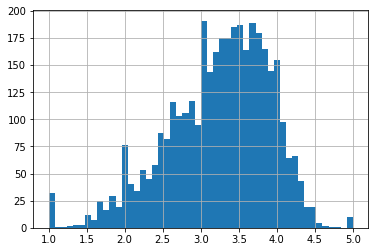

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
#see the distribution of rating 
ratings['rating'].hist(bins=50)

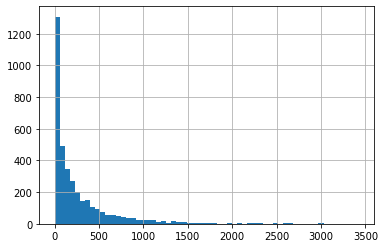

In [157]:

#see the distribution of number of ratings 
ratings['number_of_ratings'].hist(bins=60)

**see the distribution of rating and number of rating. We do find that the more ratings, the better this movie perform**

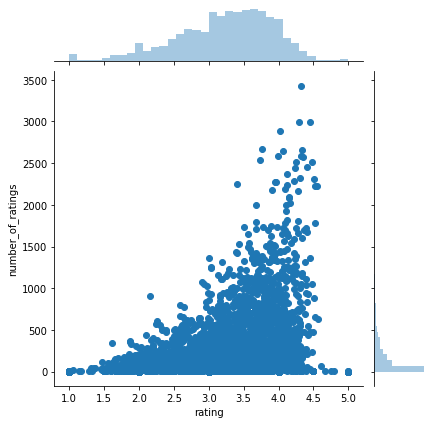

In [158]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

**Start recommender system by making a matrix, which row is each user, column is each movie and the value is rating.**

In [137]:
movie_matrix = df.pivot_table(index='user_id', columns='movie_title', values='rating')
movie_matrix.head()

movie_title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
movie_title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


**For the simple learning, we only see how to recommande the movie for the people who like the most 2 popular movie,which is American Beauty and Star Wars: Episode IV - A New Hope**

In [160]:
AB_user_rating = movie_matrix['American Beauty (1999)']
SWEV_user_rating = movie_matrix['Star Wars: Episode IV - A New Hope (1977)']

In [161]:
AB_user_rating.head()

user_id
1    NaN
2    4.0
3    4.0
4    NaN
5    4.0
Name: American Beauty (1999), dtype: float64

In [162]:
SWEV_user_rating.head()

user_id
1    4.0
2    NaN
3    5.0
4    5.0
5    NaN
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

See how those movie correlate with those two popular movies

In [163]:
similar_to_American_Beauty =movie_matrix.corrwith(AB_user_rating)
similar_to_American_Beauty.head()

movie_title
$1,000,000 Duck (1971)          -0.193080
'Night Mother (1986)             0.318625
'Til There Was You (1997)        0.064574
'burbs, The (1989)               0.142070
...And Justice for All (1979)    0.182361
dtype: float64

In [164]:
similar_to_Star_Wars_VI =movie_matrix.corrwith(SWEV_user_rating)
similar_to_Star_Wars_VI.head()

movie_title
$1,000,000 Duck (1971)           0.090778
'Night Mother (1986)             0.104399
'Til There Was You (1997)        0.024925
'burbs, The (1989)               0.107898
...And Justice for All (1979)    0.020055
dtype: float64

By making the result more understandable, we make them to dataframe and drop the null value

In [165]:
corr_AB = pd.DataFrame(similar_to_American_Beauty, columns=['Correlation'])
corr_AB.dropna(inplace=True)
corr_AB.head()

,Correlation
movie_title,
"$1,000,000 Duck (1971)",-0.193080
'Night Mother (1986),0.318625
'Til There Was You (1997),0.064574
"'burbs, The (1989)",0.142070
...And Justice for All (1979),0.182361


In [166]:
corr_SW = pd.DataFrame(similar_to_Star_Wars_VI, columns=['correlation'])
corr_SW.dropna(inplace=True)
corr_SW.head()

,correlation
movie_title,
"$1,000,000 Duck (1971)",0.090778
'Night Mother (1986),0.104399
'Til There Was You (1997),0.024925
"'burbs, The (1989)",0.107898
...And Justice for All (1979),0.020055


We want to only recommende the movie who have more than 100 ratings, which will be more reliable

In [167]:
corr_AB = corr_AB.join(ratings['number_of_ratings'])
corr_AB.head()

,Correlation,number_of_ratings
movie_title,,
"$1,000,000 Duck (1971)",-0.193080,37
'Night Mother (1986),0.318625,70
'Til There Was You (1997),0.064574,52
"'burbs, The (1989)",0.142070,303
...And Justice for All (1979),0.182361,199


In [168]:
corr_AB[corr_AB['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)


,Correlation,number_of_ratings
movie_title,,
American Beauty (1999),1.000000,3428
All the King's Men (1949),0.449530,119
"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",0.418774,117
Girlfight (2000),0.407817,127
Winnie the Pooh and the Blustery Day (1968),0.400987,221
Your Friends and Neighbors (1998),0.391962,109
Return of the Fly (1959),0.389331,104
Heaven & Earth (1993),0.383185,105
Flawless (1999),0.379233,110


**For the people who like American Beauty, we can recommend them All the King's Men.**

In [169]:
corr_SW = corr_SW.join(ratings['number_of_ratings'])
corr_SW.head()

,correlation,number_of_ratings
movie_title,,
"$1,000,000 Duck (1971)",0.090778,37
'Night Mother (1986),0.104399,70
'Til There Was You (1997),0.024925,52
"'burbs, The (1989)",0.107898,303
...And Justice for All (1979),0.020055,199


In [170]:

corr_SW[corr_SW['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)


,correlation,number_of_ratings
movie_title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,2991
Star Wars: Episode V - The Empire Strikes Back (1980),0.661552,2990
Star Wars: Episode VI - Return of the Jedi (1983),0.574808,2883
Raiders of the Lost Ark (1981),0.421425,2514
Dracula (1958),0.398710,102
Girlfight (2000),0.365521,127
Star Wars: Episode I - The Phantom Menace (1999),0.363200,2250
Gilda (1946),0.331009,107
Superman (1978),0.309484,1222


**For the people who like Star Wars: Episode IV, we can recommend them Star Wars: Episode V.**